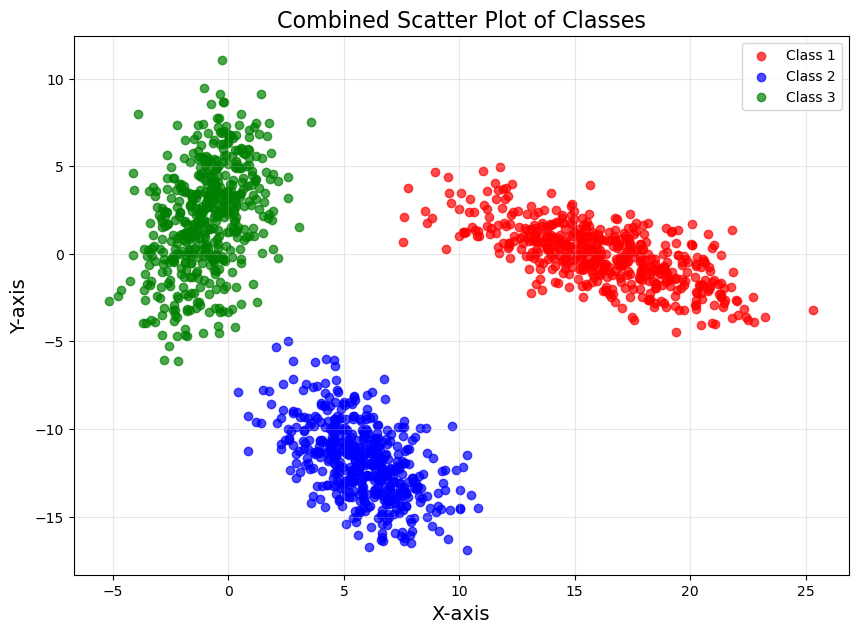


Predicted class for the random point [-3.3757 -1.5305]: 2.0


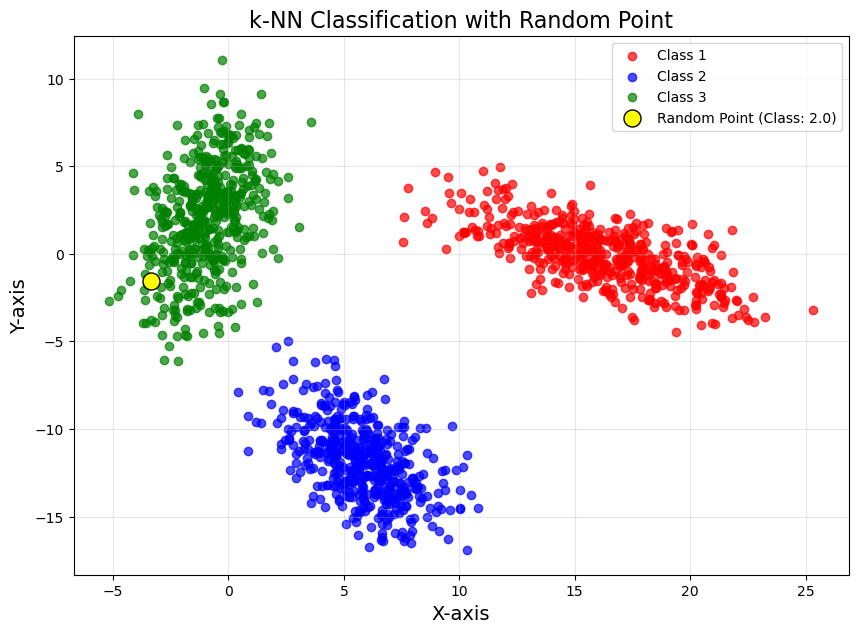

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from collections import Counter

# Load datasets with space delimiter
class1 = pd.read_csv(r'C:\Users\nitip\OneDrive\Desktop\dec2024\Group04[1]\Group04\LS_Group04\Class1.txt', delimiter=' ', header=None)
class1.columns = ['X', 'Y']
class2 = pd.read_csv(r'C:\Users\nitip\OneDrive\Desktop\dec2024\Group04[1]\Group04\LS_Group04\Class2.txt', delimiter=' ', header=None)
class2.columns = ['X', 'Y']
class3 = pd.read_csv(r'C:\Users\nitip\OneDrive\Desktop\dec2024\Group04[1]\Group04\LS_Group04\Class3.txt', delimiter=' ', header=None)
class3.columns = ['X', 'Y']

# Combine the datasets
combined_dataset = pd.concat([class1, class2, class3], ignore_index=True)

# Scatter plot for classes
plt.figure(figsize=(10, 7))

plt.scatter(class1['X'], class1['Y'], color='red', label='Class 1', alpha=0.7)
plt.scatter(class2['X'], class2['Y'], color='blue', label='Class 2', alpha=0.7)
plt.scatter(class3['X'], class3['Y'], color='green', label='Class 3', alpha=0.7)

plt.title("Combined Scatter Plot of Classes", fontsize=16)
plt.xlabel("X-axis", fontsize=14)
plt.ylabel("Y-axis", fontsize=14)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Features and labels
X = combined_dataset[['X', 'Y']]  # Features (X and Y)
y = np.concatenate([np.zeros(len(class1)), np.ones(len(class2)), np.full(len(class3), 2)])  # Labels: Class 1, 2, 3

# Split the data into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size=0.3, random_state=42)

# Function to calculate Euclidean distances between a random point and dataset
def euclidean_distances(X_train, random_point):
    distances = np.sqrt(np.sum((X_train - random_point) ** 2, axis=1))
    return distances

# k-NN class definition
class KNN:
    def __init__(self, k=73):
        self.k = k  # Number of neighbors

    # Fit the model
    def fit(self, X_train, y_train):
        self.X_train = X_train  # Store training data
        self.y_train = y_train  # Store training labels

    # Predict the class of a given data point
    def predict(self, X_test):
        predictions = [self._predict(x) for x in X_test]
        return predictions

    # Predict the class for a single data point
    def _predict(self, x):
        distances = euclidean_distances(self.X_train, x)  # Calculate distances
        k_indices = np.argsort(distances)[:self.k]  # Get indices of k nearest neighbors
        k_nearest_labels = [self.y_train[i] for i in k_indices]  # Get labels of nearest neighbors
        most_common = Counter(k_nearest_labels).most_common(1)  # Get the most common label
        return most_common[0][0]

# Initialize and train k-NN classifier
knn = KNN(k=73)
knn.fit(X_train, y_train)

# Select a random point for prediction
random_point = X.sample(n=1).values.flatten()

# Predict the class for the random point
predicted_class = knn.predict([random_point])[0]
print(f"\nPredicted class for the random point {random_point}: {predicted_class}")

# Plot random point with classes
plt.figure(figsize=(10, 7))
plt.scatter(class1['X'], class1['Y'], color='red', label='Class 1', alpha=0.7)
plt.scatter(class2['X'], class2['Y'], color='blue', label='Class 2', alpha=0.7)
plt.scatter(class3['X'], class3['Y'], color='green', label='Class 3', alpha=0.7)
plt.scatter(random_point[0], random_point[1], color='yellow', edgecolor='black', s=150, label=f'Random Point (Class: {predicted_class})')

plt.title("k-NN Classification with Random Point", fontsize=16)
plt.xlabel("X-axis", fontsize=14)
plt.ylabel("Y-axis", fontsize=14)
plt.legend()
plt.grid(alpha=0.3)
plt.show()


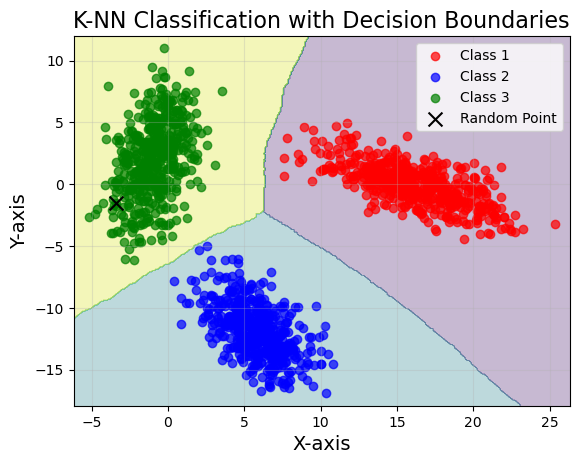

In [47]:
x_min, x_max = X['X'].min() - 1, X['X'].max() + 1
y_min, y_max = X['Y'].min() - 1, X['Y'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Predict the class for each point in the grid
grid_predictions = knn.predict(grid_points)
grid_predictions = np.array(grid_predictions).reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, grid_predictions, alpha=0.3)
plt.scatter(class1['X'], class1['Y'], color='red', label='Class 1', alpha=0.7)
plt.scatter(class2['X'], class2['Y'], color='blue', label='Class 2', alpha=0.7)
plt.scatter(class3['X'], class3['Y'], color='green', label='Class 3', alpha=0.7)
plt.scatter(random_point[0], random_point[1], color='black', marker='x', label='Random Point', s=100)
plt.title("K-NN Classification with Decision Boundaries", fontsize=16)
plt.xlabel("X-axis", fontsize=14)
plt.ylabel("Y-axis", fontsize=14)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

Class 1: Precision = 1.00, Recall = 1.00, F-Score = 1.00
Class 2: Precision = 1.00, Recall = 1.00, F-Score = 1.00
Class 3: Precision = 1.00, Recall = 1.00, F-Score = 1.00


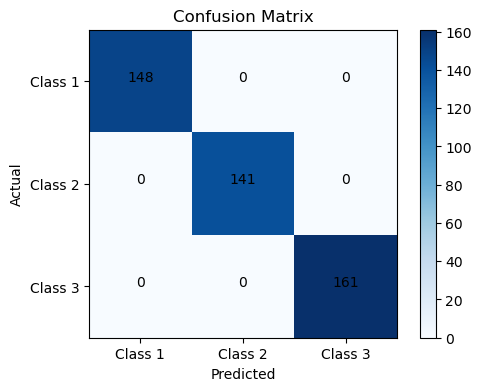

In [48]:
# Calculate precision, recall, and F-score for each class
precision = []
recall = []
f_score = []

for i in range(3):
    TP = cm[i, i]  # True Positives: Diagonal elements
    FP = cm[:, i].sum() - TP  # False Positives: Sum of column - TP
    FN = cm[i, :].sum() - TP  # False Negatives: Sum of row - TP
    TN = cm.sum() - (TP + FP + FN)  # True Negatives: Total - (TP + FP + FN)
    
    # Precision, Recall, and F-Score for each class
    if (TP + FP) != 0:
        precision.append(TP / (TP + FP))
    else:
        precision.append(0)

    if (TP + FN) != 0:
        recall.append(TP / (TP + FN))
    else:
        recall.append(0)
        
    if (precision[i] + recall[i]) != 0:
        f_score.append(2 * (precision[i] * recall[i]) / (precision[i] + recall[i]))
    else:
        f_score.append(0)

# Print Precision, Recall, and F-score for each class
for i in range(3):
    print(f"Class {i+1}: Precision = {precision[i]:.2f}, Recall = {recall[i]:.2f}, F-Score = {f_score[i]:.2f}")

# Plot confusion matrix
plt.figure(figsize=(6, 4))
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Add labels to each cell in the matrix
for i in range(3):
    for j in range(3):
        plt.text(j, i, str(cm[i, j]), horizontalalignment="center", color="black")

plt.xticks(np.arange(3), ['Class 1', 'Class 2', 'Class 3'])
plt.yticks(np.arange(3), ['Class 1', 'Class 2', 'Class 3'])

plt.colorbar()
plt.show()
